In [119]:
import time as time
import datetime as datetime
import pandas as pd
import yfinance as yf
import matplotlib as plt


In [120]:
ticker = 'TSLA'
period1 = int(time.mktime(datetime.datetime(2020, 12, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 12, 31, 23, 59).timetuple()))
interval = '1d' # 1wk, 1m

url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'


In [153]:
df = pd.read_csv(url)
columns = ['Date','open', 'high', 'low', 'close', 'adj close', 'volume']
df.columns = columns
df


,Date,open,high,low,close,adj close,volume
1,2020-12-02,185.479996,190.513336,180.403336,189.606674,189.606674,143327100
2,2020-12-03,196.673340,199.656662,194.143326,197.793335,197.793335,127656000
3,2020-12-04,197.003326,199.679993,195.166672,199.679993,199.679993,88203900
4,2020-12-07,201.639999,216.263336,201.016663,213.919998,213.919998,168929100
5,2020-12-08,208.503326,217.093338,206.166672,216.626663,216.626663,192795000
...,...,...,...,...,...,...,...
511,2022-12-12,176.100006,177.369995,167.520004,167.820007,167.820007,109794500
512,2022-12-13,174.869995,175.050003,156.910004,160.949997,160.949997,175862700
513,2022-12-14,159.250000,161.619995,155.309998,156.800003,156.800003,140682300
514,2022-12-15,153.440002,160.929993,153.279999,157.669998,157.669998,122334500


STOCHASTIC OSCILLATOR

In [122]:
#OSCILLATOR FORMULA
LOW_14 = df['low'].rolling(14).min()
HIGH_14 = df['high'].rolling(14).max()
C = df['close']
K = ((C - LOW_14) * 100 / (HIGH_14 - LOW_14))
Dvalue = K.rolling(3).mean()


In [123]:
#BUY AND SELL SIGNAL
#finding values less than 20 and more than 80
osell = Dvalue.loc[Dvalue>80]
obuy = Dvalue.loc[Dvalue<20]


<AxesSubplot: >

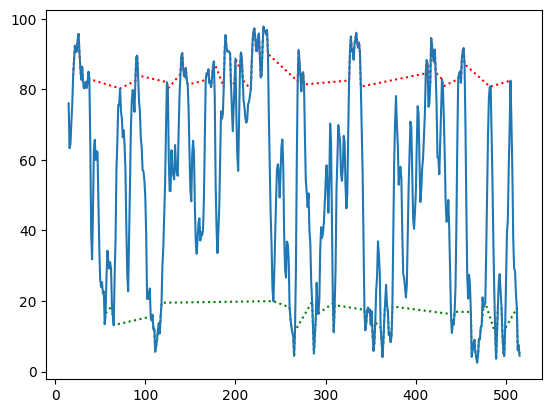

In [124]:
osell.plot(color='red', linestyle='dotted')
obuy.plot(color='green', linestyle='dotted')
Dvalue.plot()
#df['close'].plot()


MACD

In [125]:
#Calculates divergence of stock price momentum 

exp1 = df['close'].ewm(span=12).mean()
exp2 = df['close'].ewm(span=26).mean() 
macd = exp1 - exp2
signal = macd.ewm(span=9).mean()


In [133]:
#need to find a way to select values where MACD is separated from the
#the signal by a difference of +-3

msell = macd.loc[macd>signal]
mbuy = macd.loc[macd<signal]


<AxesSubplot: >

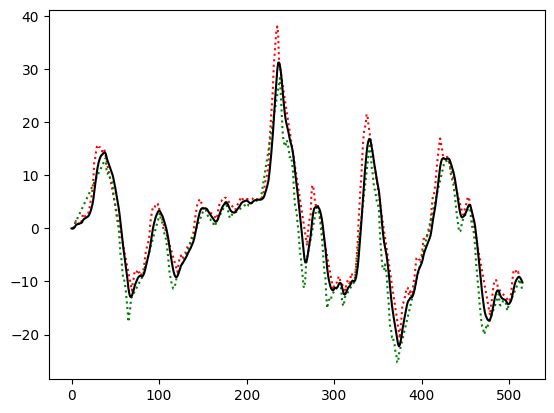

In [150]:
#Plotting Variables


msell.plot(color='red', linestyle='dotted')
mbuy.plot(color='green', linestyle='dotted')
#macd.plot(color='pink')
signal.plot(color='black')
#df['close'].plot(secondary_y=True)


Bollinger Bands

In [135]:
#BB formula and variables
ma_30 = df['close'].rolling(window=30).mean()
std_20 = df['close'].rolling(window=20).std() 
upper = (ma_30 + 2*std_20)
lower = (ma_30 - 2*std_20)


In [136]:
#selecting dates and values where the price is greater than the upper
#and less than the lower
bsell = df['close'].loc[df['close']>upper]
bbuy = df['close'].loc[df['close']<lower]


<AxesSubplot: >

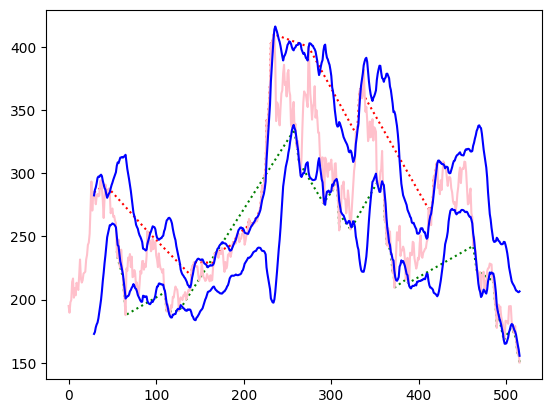

In [148]:
#Plotting buy and sell signals
bsell.plot(color='red', linestyle='dotted')
bbuy.plot(color='green', linestyle='dotted')
df['close'].plot(color='pink')

upper.plot(color='blue')
lower.plot(color='blue')
